# **Uber Fares Dataset** 
This dataset contains trips information of Uber Drivers.

**The dataset contains the following fields:**
- **key - Unnamed: 0** : a unique identifier for each trip
- **fare_amount** : the cost of each trip in usd
- **pickup_datetime** : date and time when the meter was engaged
- **pickup_longitude** : the longitude where the meter was engaged
- **pickup_latitude** : the latitude where the meter was engaged
- **dropoff_longitude** : the longitude where the meter was disengaged
- **dropoff_latitude** : the latitude where the meter was disengaged
- **passenger_count** : the number of passengers in the vehicle (driver entered value)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
uber = pd.read_csv('uber.csv')

In [27]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [28]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [29]:
#Delete 'Unnamed: 0' column
uber.drop(labels='Unnamed: 0', axis=1, inplace = True)

In [30]:
uber.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# Using **Haversine Formula** to calculate distance.
Adding the distance column to the uber dataframe.


In [31]:
def haversine(lat1,lon1,lat2,lon2):

    R = 6371  # radius of Earth in km
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2) ** 2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    d = R * c #km
    return d
uber['distance'] = haversine(uber['pickup_latitude'], uber['pickup_longitude'], uber['dropoff_latitude'], uber['dropoff_longitude'])

In [32]:
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [33]:
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])

uber['year'] = uber.pickup_datetime.dt.year
uber['month'] = uber.pickup_datetime.dt.month
uber['weekday'] = uber.pickup_datetime.dt.weekday
uber['hour'] = uber.pickup_datetime.dt.hour

In [34]:
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,weekday,hour
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,3,19
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,4,20
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,8,0,21
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,6,4,8
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,8,3,17


In [35]:
uber.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,weekday,hour
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,20.855350,2011.742440,6.281795,3.048425,13.491335
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,382.964642,1.856397,3.438925,1.946946,6.515531
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222,2010.000000,3.000000,1.000000,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992,2012.000000,6.000000,3.000000,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169,2013.000000,9.000000,5.000000,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,2015.000000,12.000000,6.000000,23.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


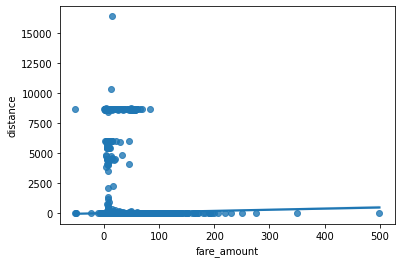

In [36]:
sns.regplot(uber.fare_amount,uber.distance)

In [37]:
#group the data based on the number of the passengers
pass_count = pd.DataFrame(uber.groupby('passenger_count').count()['key'])

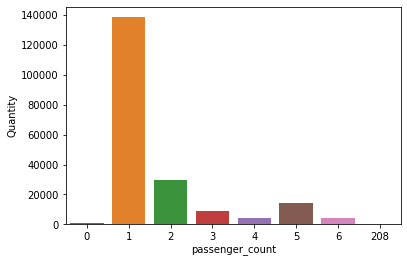

In [38]:
fig = sns.barplot(x=pass_count.index, y='key', data=pass_count)
fig.set_ylabel('Quantity')
plt.show(fig)

In [ ]:
# Based on the two above plots we can define rules for data cleaning as follows:
# fare_amount > 0 and fare_amount < 250, distance > 0, distance < 500
# passenger_count != 208 and !=0
# lan != 0 or lat != 0

In [39]:
# data cleaning
uber = uber[(uber['pickup_longitude'] != 0) & (uber['pickup_latitude'] != 0) & (uber['dropoff_longitude'] != 0) & (uber['dropoff_latitude'] != 0) & (uber['distance'] > 0) &
             (uber['distance'] < 250) & (uber['passenger_count'] != 208) & (uber['passenger_count'] != 0) & ((uber['fare_amount'] > 0)) & (uber['fare_amount'] < 250)]

In [41]:
# new dataset based on cleaned uber dataset 
uber2 = uber[['fare_amount', 'passenger_count', 'distance', 'year', 'month', 'weekday', 'hour']]

In [42]:
uber2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 193221 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      193221 non-null  float64
 1   passenger_count  193221 non-null  int64  
 2   distance         193221 non-null  float64
 3   year             193221 non-null  int64  
 4   month            193221 non-null  int64  
 5   weekday          193221 non-null  int64  
 6   hour             193221 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.8 MB


In [43]:
uber2.corr()

,fare_amount,passenger_count,distance,year,month,weekday,hour
fare_amount,1.000000,0.012101,0.783851,0.121323,0.024451,0.005903,-0.020478
passenger_count,0.012101,1.000000,0.005087,0.005337,0.008817,0.036316,0.014738
distance,0.783851,0.005087,1.000000,0.018617,0.007365,0.016048,-0.027231
year,0.121323,0.005337,0.018617,1.000000,-0.115184,0.005970,0.001895
month,0.024451,0.008817,0.007365,-0.115184,1.000000,-0.009121,-0.004312
weekday,0.005903,0.036316,0.016048,0.005970,-0.009121,1.000000,-0.085939
hour,-0.020478,0.014738,-0.027231,0.001895,-0.004312,-0.085939,1.000000


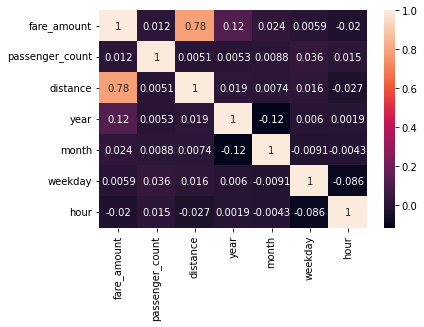

In [44]:
sns.heatmap(uber2.corr(), annot=True)

**Based on the above plot the most correlated feature with "fare amount" is "distance".**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


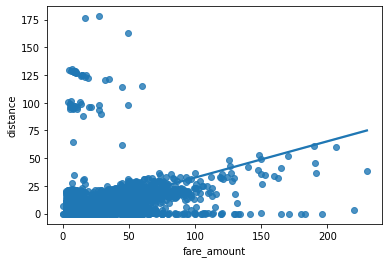

In [45]:
sns.regplot(uber2.fare_amount,uber2.distance)

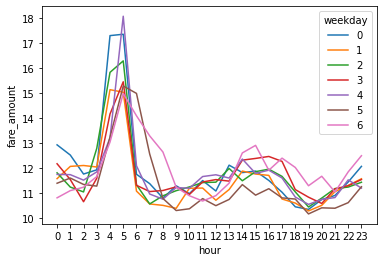

In [46]:
fig = sns.lineplot(x='hour',y='fare_amount', hue= 'weekday', data=uber2, ci=None, palette="tab10")
fig.set_xticks(np.arange(0,24))
plt.show(fig)

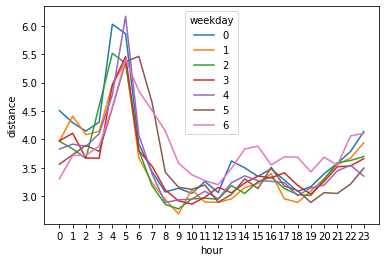

In [47]:
fig = sns.lineplot(x='hour',y='distance', hue= 'weekday', data=uber2, ci=None, palette="tab10")
fig.set_xticks(np.arange(0,24))
plt.show(fig)

# Training and Testing

In [48]:
X = uber[['passenger_count', 'distance']]
y = uber['fare_amount']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training

In [51]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Prediction

Text(0, 0.5, 'Predicted Y')

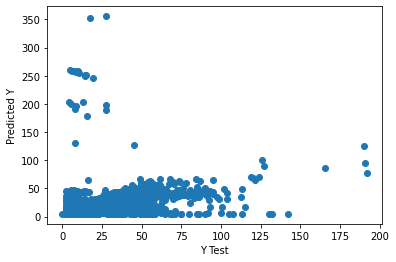

In [52]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.6301692353062833
MSE: 43.28162924812731
RMSE: 6.578877506697272


## Residuals

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


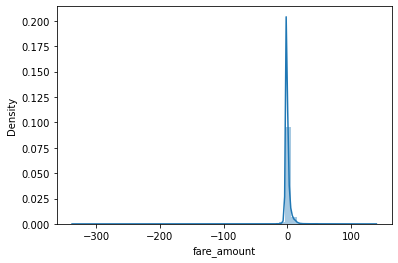

In [54]:
sns.distplot((y_test-predictions),bins=50)

In [55]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
passenger_count,0.055261
distance,1.971797


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **distance** is associated with an **increase of 1.971797 fare_amount**.